<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/P2_Sistemas/Tarea_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bursátil

Realizar un programa en Python que consultando una base de datos (la que
usted prefiera) calcule SMA, WMA y EMA de un menú de acciones.

## Librerías

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones

*   Kohl's Corporation (KSS)
*   Best Buy (BBY)
*   General Motors Company (GM)



[*********************100%***********************]  1 of 1 completed



Indicadores para KSS:
Price                          Close   SMA_50   SMA_200     WMA_20     EMA_20
Ticker                           KSS                                         
Date                                                                         
2024-10-25 00:00:00+00:00  19.040001  19.6784  23.22545  19.697143  19.700113
2024-10-28 00:00:00+00:00  19.049999  19.6504  23.18705  19.632810  19.638197
2024-10-29 00:00:00+00:00  18.879999  19.6286  23.15085  19.562048  19.565988
2024-10-30 00:00:00+00:00  18.709999  19.6082  23.11640  19.483809  19.484465
2024-10-31 00:00:00+00:00  18.480000  19.5872  23.08405  19.387428  19.388802


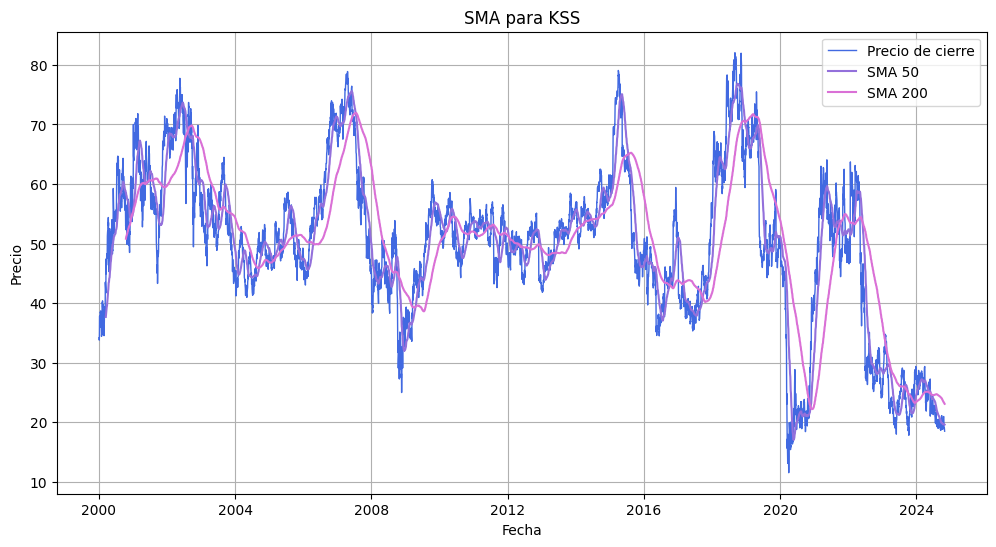

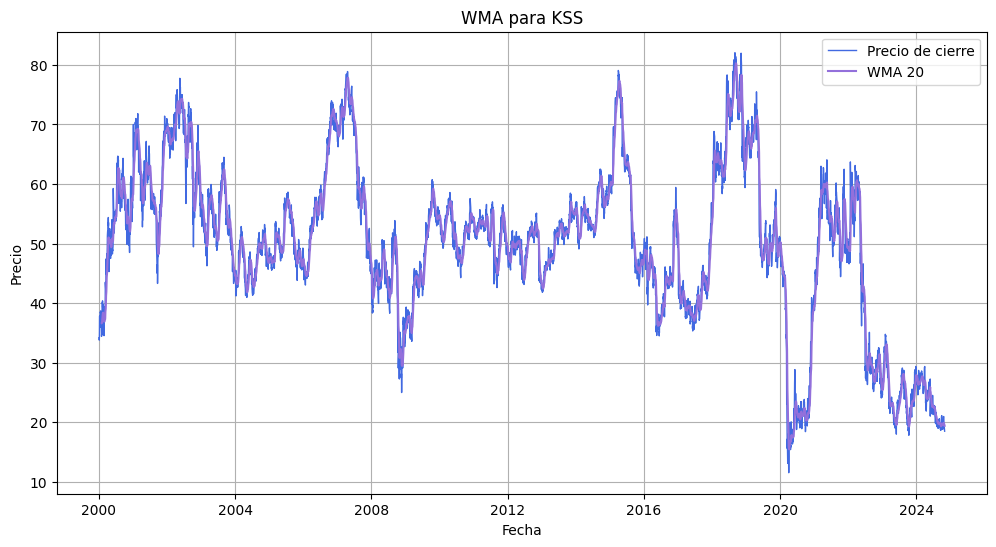

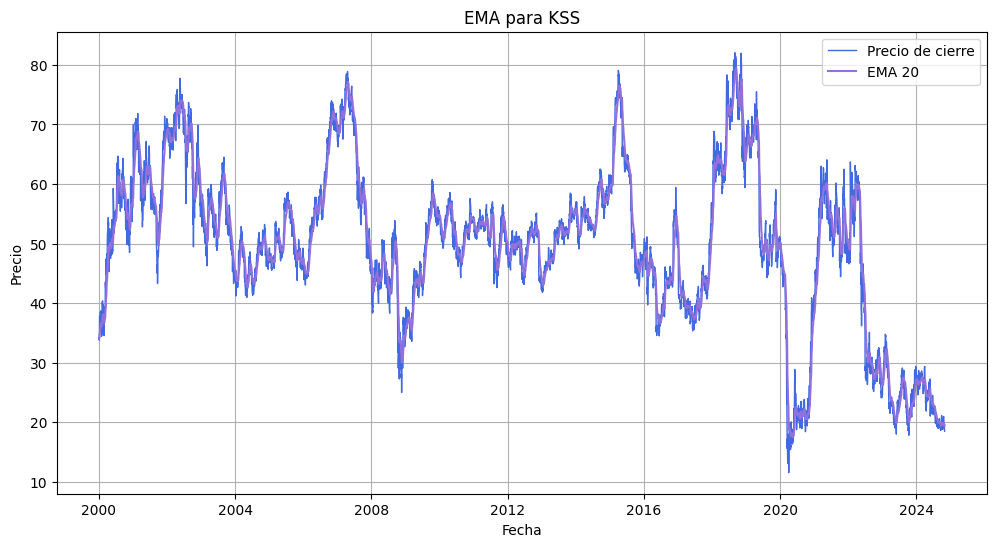

[*********************100%***********************]  1 of 1 completed



Indicadores para BBY:
Price                          Close   SMA_50   SMA_200     WMA_20     EMA_20
Ticker                           BBY                                         
Date                                                                         
2024-10-25 00:00:00+00:00  92.680000  96.0758  83.60265  95.852714  96.067679
2024-10-28 00:00:00+00:00  91.540001  96.2018  83.68710  95.310905  95.636472
2024-10-29 00:00:00+00:00  89.970001  96.3004  83.76765  94.675571  95.096808
2024-10-30 00:00:00+00:00  90.410004  96.4138  83.86040  94.136334  94.650446
2024-10-31 00:00:00+00:00  90.430000  96.4816  83.95685  93.643286  94.248498


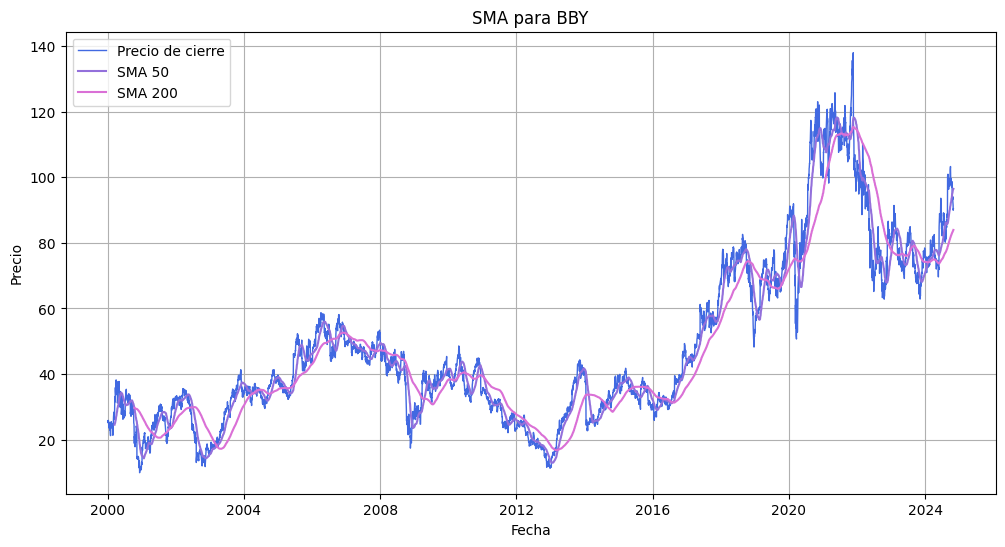

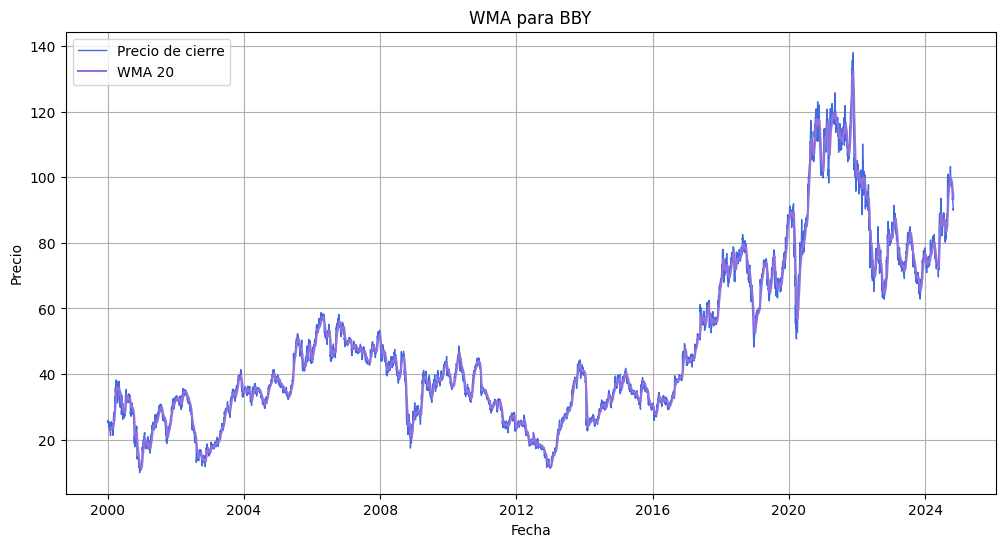

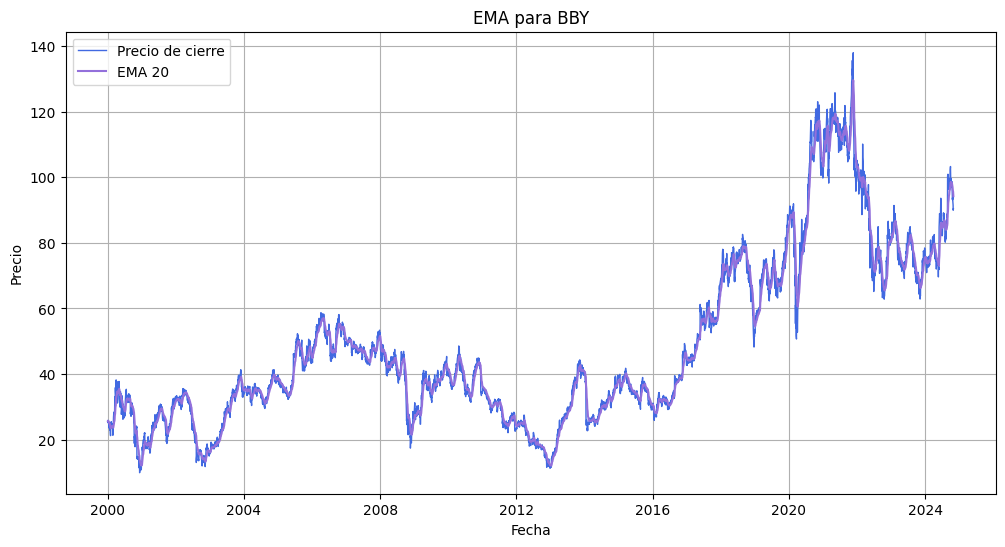

[*********************100%***********************]  1 of 1 completed



Indicadores para GM:
Price                          Close   SMA_50   SMA_200     WMA_20     EMA_20
Ticker                            GM                                         
Date                                                                         
2024-10-25 00:00:00+00:00  52.070000  47.7238  44.21095  49.685190  49.347697
2024-10-28 00:00:00+00:00  52.730000  47.8720  44.29530  50.111381  49.669821
2024-10-29 00:00:00+00:00  51.540001  47.9876  44.37670  50.386666  49.847934
2024-10-30 00:00:00+00:00  51.970001  48.1074  44.45960  50.671190  50.050035
2024-10-31 00:00:00+00:00  50.759998  48.1914  44.53835  50.806428  50.117651


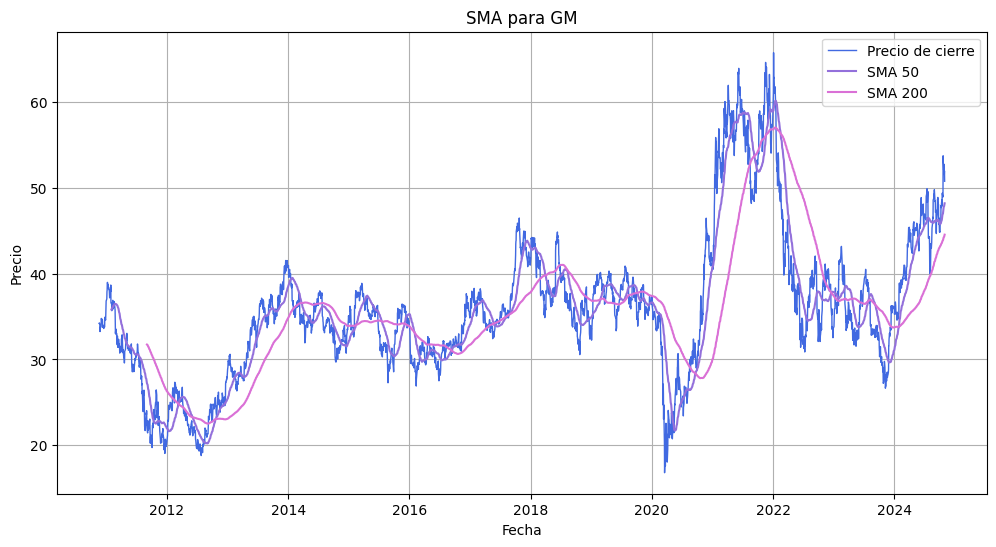

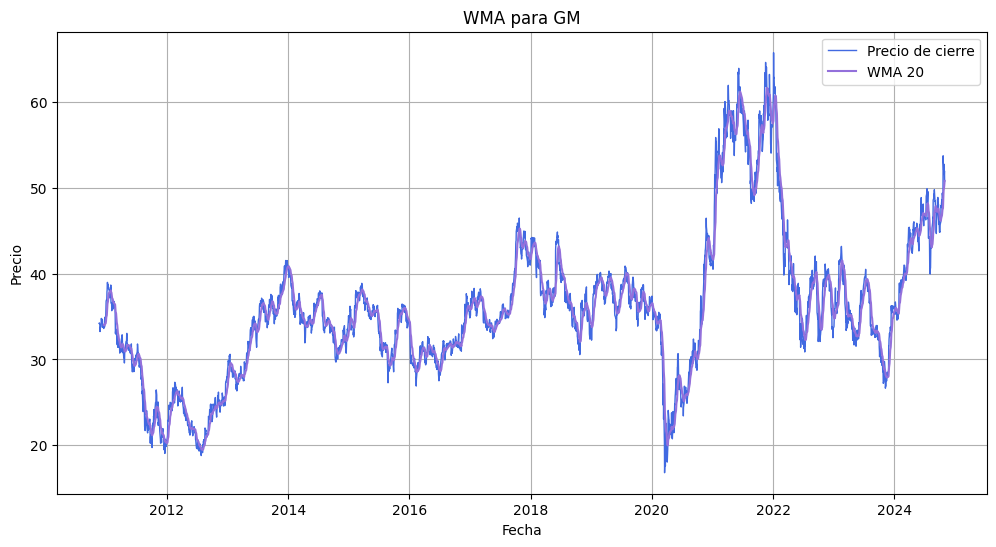

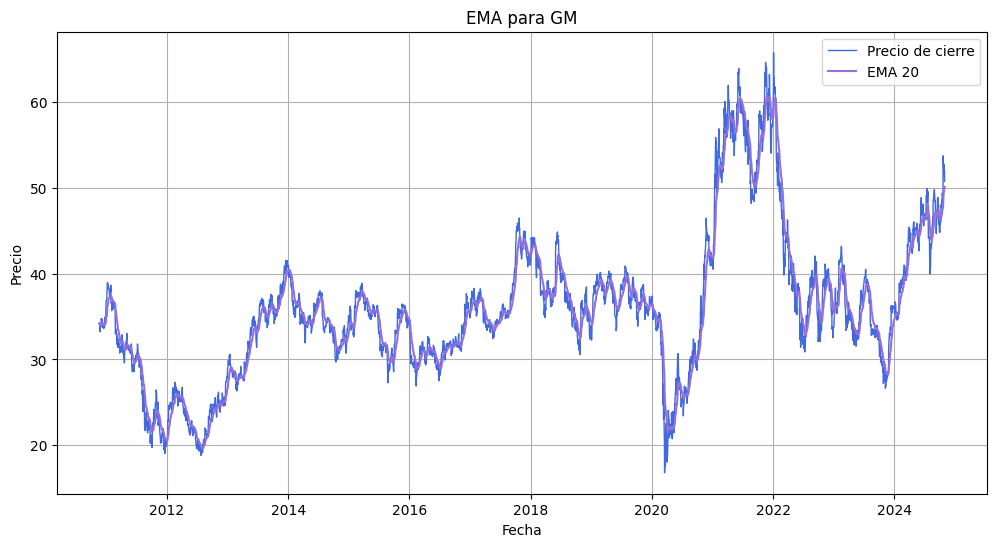

In [12]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

acciones = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

def indicadores(symbol):
    df = yf.download(symbol, start=start_date, end=end_date)

    # SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # WMA
    weights = np.arange(1, 21)
    df['WMA_20'] = df['Close'].rolling(window=20).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

    # EMA
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    return df

for accion in acciones:
    df = indicadores(accion)

    # Mostrar los últimos datos calculados
    print(f"\nIndicadores para {accion}:")
    print(df[['Close', 'SMA_50', 'SMA_200', 'WMA_20', 'EMA_20']].tail())

    # Graficar SMA
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Precio de cierre', color='royalblue', linewidth=1)
    plt.plot(df['SMA_50'], label='SMA 50', linestyle='-', color='mediumpurple')
    plt.plot(df['SMA_200'], label='SMA 200', linestyle='-', color='orchid')
    plt.title(f"SMA para {accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar WMA
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Precio de cierre', color='royalblue', linewidth=1)
    plt.plot(df['WMA_20'], label='WMA 20', linestyle='-', color='mediumpurple')
    plt.title(f"WMA para {accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar EMA
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Precio de cierre', color='royalblue', linewidth=1)
    plt.plot(df['EMA_20'], label='EMA 20', linestyle='-', color='mediumpurple')
    plt.title(f"EMA para {accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.show()
